In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [2]:
import numpy as np
import cv2
import torch

import models

In [5]:
from matplotlib import pyplot as plt

In [ ]:
model_path = "mobilenet-nnconv5dw-skipadd-pruned.pth.tar"
checkpoint = torch.load(model_path, map_location='cpu')

In [4]:
model = checkpoint['model']
model.eval()

MobileNetSkipAdd(
  (conv0): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace)
  )
  (conv1): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace)
    (3): Conv2d(16, 56, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (4): BatchNorm2d(56, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU6(inplace)
  )
  (conv2): Sequential(
    (0): Conv2d(56, 56, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=56, bias=False)
    (1): BatchNorm2d(56, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace)
    (3): Conv2d(56, 88, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (4): BatchNorm2d(88, eps=

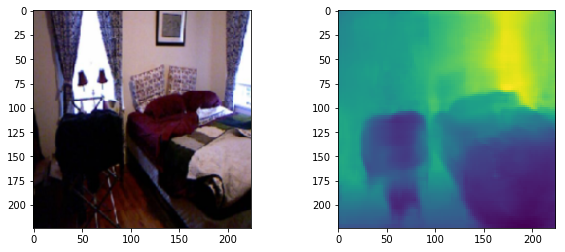

In [7]:
# Output of bed001.png is consistent w/ Fig. 4 in the paper 
im = cv2.imread("./test_imgs/bed001.png")[..., ::-1]
im = cv2.resize(im, (224,224))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(im)

im = np.transpose(im, (2,0,1))[np.newaxis, ...]
preds = model(torch.from_numpy(im/255).float())
preds_cpu = preds.cpu().detach().numpy()
plt.subplot(1,2,2)
plt.imshow(preds_cpu[0,0,...])